# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the terminal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

#### In this project, I want to see which kind of customer used the offers sent by the Starbucks app. To solve this problem, I will firstly run exploratory data analysis, then do some data cleaning. After I obtain reliable data set, I will use the data set to make plots to answer my question and write a blog about it.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Exploratory Data Analysis

## Profile

In [2]:
# Check the profile data set
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [3]:
# Check the ratio of missing gender in profile
print(profile['gender'].unique())
print(profile['gender'].nunique())
print(profile[profile['gender']=='O'].shape[0]/profile.shape[0])

[None 'F' 'M' 'O']
3
0.012470588235294117


0
88.0


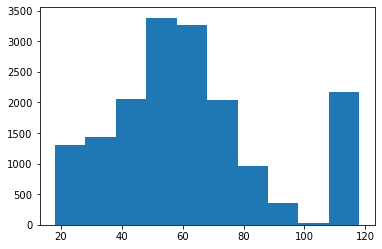

In [4]:
# Check whether there is nan in age and whether there are outliers in profile
print(profile['age'].isnull().sum())
plt.hist(profile['age']);
print(profile['age'].quantile(0.85))

In [5]:
# Check whether there is nan in id in profile
print(profile['id'].isnull().sum())

0


In [6]:
# Check whether became_member_on has nan and the data type in profile
print(profile['became_member_on'].dtype)
profile['became_member_on']=pd.to_datetime(profile['became_member_on'],format='%Y%m%d')

int64


In [7]:
# Check whether became_member_on has nan and the data type in profile
profile['became_member_on'].isnull().sum()

0

In [8]:
# Check whether income has nan and use mean income to fill in the missing values in profile
print(profile['income'].isnull().sum())
income_mean=round(profile['income'].mean(),1)
profile['income']=profile['income'].fillna(income_mean)

2175


In [9]:
# Drop the data which has gender equals to Other and data which has age larger than 80
profile=profile[profile['gender']!='O']
profile=profile[profile['age']<=80]

In [10]:
# Save the year of become_member_on column in profile
profile['became_member_on']=profile['became_member_on'].dt.year

In [11]:
# Change the id column to customer_id
profile=profile.rename(columns={'id':'customer_id'})

In [12]:
# Check statistic of the data
profile.describe()

,age,became_member_on,income
count,13639.000000,13639.000000,13639.000000
mean,52.082557,2016.619620,64978.370848
std,15.577298,1.205909,21507.677446
min,18.000000,2013.000000,30000.000000
25%,41.000000,2016.000000,48000.000000
50%,54.000000,2017.000000,63000.000000
75%,64.000000,2017.000000,79000.000000
max,80.000000,2018.000000,120000.000000


In [13]:
# Check whether there are duplicated data
profile.duplicated().sum()

0

In [14]:
# Check the profile data set one more time
profile.head()

,gender,age,customer_id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017,51000.0


In [15]:
# Check the general info of the cleaned data set
profile.describe()

,age,became_member_on,income
count,13639.000000,13639.000000,13639.000000
mean,52.082557,2016.619620,64978.370848
std,15.577298,1.205909,21507.677446
min,18.000000,2013.000000,30000.000000
25%,41.000000,2016.000000,48000.000000
50%,54.000000,2017.000000,63000.000000
75%,64.000000,2017.000000,79000.000000
max,80.000000,2018.000000,120000.000000


In [16]:
# Check the ratio of number of males to females in the data set
print(profile[profile['gender']=='M'].shape[0])
print(profile[profile['gender']=='F'].shape[0])
print(round(profile[profile['gender']=='M'].shape[0]/profile[profile['gender']=='F'].shape[0],2))

8069
5570
1.45


#### From the data above it is not hard to see customers become members from 2013 to 2018. There are 13639 customers, the ratio of male to female is about 1.5. We need to notice this is an imbalanced data set.  

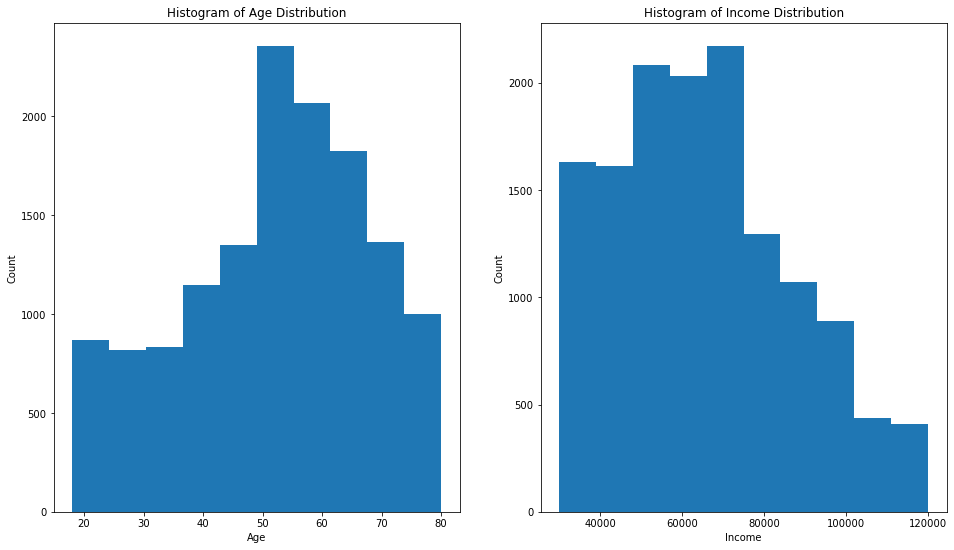

In [17]:
# Plot the distribution of age and income using the cleaned profile data set
fig,ax=plt.subplots(1,2,figsize=(16,9))

ax[0].hist(profile['age'])
ax[0].set_title('Histogram of Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

ax[1].hist(profile['income'])
ax[1].set_title('Histogram of Income Distribution')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Count');

#### Summary1: There are 15% of people which are older than 88, I cannot believe they can order a coffee with an app and get it. Hence I drop these data. Also I drop the data which has gender as other since I believe gender will have a inpact on coffee preference and I donot want these other gender to bias the data. Lastly I only save the year when customers become members since I think the time they become a member will influence their decision when they get an offer.   

## Portfolio

In [18]:
# Check the portfolio data set
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [19]:
# Change the id column to offer_id column
portfolio=portfolio.rename(columns={'id':'offer_id'})
portfolio

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


#### Summary2: This data set contains the type of offer and related data. I have no idea of how to deat with it yet. I will check the next data set and see what I can do with this data set.  

## Transcript

In [20]:
# Check transcript data set
transcript.sample(5)

,person,event,value,time
303861,8dcbd64b4c664b5da20e8203ca26486c,transaction,{'amount': 0.4},702
139917,ab147264895d4aebbb0fcbcde4ce3393,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},372
34936,d404110ac63349a3972ef63e74490154,transaction,{'amount': 8.18},66
233350,070a3bb5f2874b9da388626c84b4b64a,offer completed,"{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",540
85435,c18566c8d89149a3b87f828a6e22b47b,transaction,{'amount': 762.7},216


In [21]:
# Check general info of transcript
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [22]:
# Check rows of different events
print(transcript[transcript['event']=='offer received'].shape[0])
print(transcript[transcript['event']=='offer viewed'].shape[0])
print(transcript[transcript['event']=='transaction'].shape[0])
print(transcript[transcript['event']=='offer completed'].shape[0])

76277
57725
138953
33579


#### Summary3: From the numbers above it is obvious to see that among the 76277 offers sent, only 57725 offers were viewed. Then among these viewed offers, only 33579 offers were completed. It is possible that a customer finished an offer without viewing it. The correct sequence should be receiving offer, viewing offer, completing offer.  For the infomational offer the correct sequence should be viewing offer and transaction.  
#### Hence next step I am going to seperate the portfolio data set into the part with info of viewing offer, the part with info of completing offer and the part of transaction. The part of receiving offer is not related with my investigation since in this project I am concerned with the customers who viewed and used the offers. Also, the time of completing offer must be later/larger than viewing offer and not exclude the duration of an offer. The time of transaction must be later/larger than viewing informational offer and not exclude the duration of the an offer.  

# Data Cleaning  

In [23]:
transcript.sample(5)

,person,event,value,time
106154,e46c47a54e254756bbc5c30ec010cc37,transaction,{'amount': 5.13},306
237618,4a589fd32b3d4f60905efd0705bc19bd,transaction,{'amount': 6.84},552
170486,bd232ba14e124b91a0adcac29dc1792e,transaction,{'amount': 8.67},414
96298,ea25b858e08a4c8c8d8f299797e38374,transaction,{'amount': 12.89},252
90155,20476d940d3a4ac5ab495104ba9b7dd1,transaction,{'amount': 16.5},228


In [24]:
def df_seperate(df):
    """
    This function seperate the transcript data set into 3 data set according to the event.
    """
    # Change the person column to customer_id column
    df=df.rename(columns={'person':'customer_id'})
    
    # Make df_view and rename columns
    df_view=df[df['event']=='offer viewed']
    df_view['offer_id']=df_view['value'].apply(lambda x: x['offer id'])
    df_view.drop('value',inplace=True,axis=1)
    df_view.rename(columns={'time':'time_view'},inplace=True)
    
    # Make df_completed and rename columns
    df_completed=df[df['event']=='offer completed']
    df_completed['offer_id']=df_completed['value'].apply(lambda x: x['offer_id'])
    df_completed.drop('value',inplace=True,axis=1)
    df_completed.rename(columns={'time':'time_completed'},inplace=True)
    
    # Make df_transaction and rename columns
    df_transaction=df[df['event']=='transaction']
    df_transaction.drop('value',inplace=True,axis=1)
    df_transaction.rename(columns={'time':'time_transaction'},inplace=True)
    
    return df_view, df_completed, df_transaction

df_view, df_completed, df_transaction=df_seperate(transcript)

In [25]:
df_view.head(1)

,customer_id,event,time_view,offer_id
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d


In [26]:
df_completed.head(1)

,customer_id,event,time_completed,offer_id
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,2906b810c7d4411798c6938adc9daaa5


In [27]:
df_transaction.head(1)

,customer_id,event,time_transaction
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0


In [28]:
def merge_data(df_view,df_completed):
    """
    This function merge the df_view and df_completed together.
    """
    # dictionary of the offer_id and the duration
    time_dict={'f19421c1d4aa40978ebb69ca19b0e20d':120,
               '4d5c57ea9a6940dd891ad53e9dbe8da0':120,
               '2298d6c36e964ae4a3e7e9706d1fb8c2':168,
               'fafdcd668e3743c1bb461111dcafc2a4':240,
               'ae264e3637204a6fb9bb56bc8210ddfd':168,
               '9b98b8c7a33c4b65b9aebfe6a799e6d9':168,
               '2906b810c7d4411798c6938adc9daaa5':168,
               '0b1e1539f2cc45b7b9fa7c272da2e1d7':240}
    
    # Merge two data set together and calculate the difference of time
    df_combine=df_view.merge(df_completed,on=['customer_id','offer_id'])
    df_combine['time_diff']=df_combine['time_completed']-df_combine['time_view']
    # Filter the table to find the customer who viewed and completed the offer
    df_combine=df_combine[df_combine['time_diff']>0]
    df_combine['diff']=df_combine['offer_id'].map(lambda x:time_dict[x])
    df_combine=df_combine[df_combine['time_diff']<=df_combine['diff']]
    df_combine=df_combine.drop(['event_x','time_view','event_y','time_completed','time_diff','diff'],axis=1)
    
    return df_combine

df_offer_used=merge_data(df_view,df_completed)

In [29]:
df_offer_used.head(1)

,customer_id,offer_id
0,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d


In [30]:
def merge_data_2(df_view,df_transaction):
    """
    This function merge the df_view and df_transaction together.
    """
    # dictionary of the offer_id and the duration
    time_dict={'3f207df678b143eea3cee63160fa8bed':96,
              '5a8bc65990b245e5a138643cd4eb9837':72}
    
    # Merge two data set together and calculate the difference of time
    df_view=pd.concat([df_view[df_view['offer_id']=='3f207df678b143eea3cee63160fa8bed'],df_view[df_view['offer_id']=='5a8bc65990b245e5a138643cd4eb9837']])
    df_combine=df_view.merge(df_transaction,on=['customer_id'])
    df_combine['time_diff']=df_combine['time_transaction']-df_combine['time_view']
    # Filter the table to find the customer who viewed and completed the offer
    df_combine=df_combine[df_combine['time_diff']>0]
    df_combine['diff']=df_combine['offer_id'].map(lambda x:time_dict[x])
    df_combine=df_combine[df_combine['time_diff']<=df_combine['diff']]
    df_combine=df_combine.drop(['event_x','time_view','event_y','time_transaction','time_diff','diff'],axis=1)
    
    return df_combine

df_offer_info=merge_data_2(df_view,df_transaction)

In [31]:
df_offer_info.head(1)

,customer_id,offer_id
0,5749731ed31948abb540a956963926ba,3f207df678b143eea3cee63160fa8bed


In [32]:
def merge_data_3(df_offer_used,df_offer_info):
    """
    This function contact df_offer_used and df_offer_info firstly and then merge the new data table with the profile data set
    """
    df_combine=pd.concat([df_offer_used,df_offer_info])
    df_combine=df_combine.merge(profile,how='left',on='customer_id')
    df_combine=df_combine.merge(portfolio,how='left',on='offer_id')
    df_combine=df_combine.dropna(axis=0)
    
    return df_combine

df_clean=merge_data_3(df_offer_used,df_offer_info)

In [33]:
df_clean.head(1)

,customer_id,offer_id,gender,age,became_member_on,income,reward,channels,difficulty,duration,offer_type
0,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,M,65.0,2018.0,53000.0,5,"[web, email, mobile, social]",5,5,bogo


In [34]:
# Check whether df_clean has nan values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29061 entries, 0 to 34044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       29061 non-null  object 
 1   offer_id          29061 non-null  object 
 2   gender            29061 non-null  object 
 3   age               29061 non-null  float64
 4   became_member_on  29061 non-null  float64
 5   income            29061 non-null  float64
 6   reward            29061 non-null  int64  
 7   channels          29061 non-null  object 
 8   difficulty        29061 non-null  int64  
 9   duration          29061 non-null  int64  
 10  offer_type        29061 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.7+ MB


In [35]:
def merge_data_4(df_clean):
    """
    This function group the df_clean table by customer_id and offer_id. Then count for each customer
    which type of offer he/she used and how many times he/she used. Finally it merges the old table with
    profile table together.
    """
    df_clean=pd.DataFrame(df_clean.groupby(['customer_id','offer_type']).count()['gender']).reset_index()
    df_clean=df_clean.rename(columns={'gender':'used_times'})
    df_clean=df_clean.merge(profile,on='customer_id',how='inner')
    
    return df_clean

df_clean=merge_data_4(df_clean)
df_clean.sample(5)

,customer_id,offer_type,used_times,gender,age,became_member_on,income
10721,9c9d2659c4ec499288a96dec70fae500,bogo,1,M,65,2017,76000.0
4587,438b72c4145340d0951e2009351b2163,informational,2,F,57,2016,53000.0
6055,5903d05c8a724ebba7dacad6d6f8cd89,discount,1,M,71,2017,88000.0
13934,cc80480892f04ee0acabe628560965db,bogo,1,F,60,2016,80000.0
13717,c8be7ec18a5d4717ad94530e81e698c4,bogo,3,F,77,2017,109000.0


In [36]:
# Check whether df_clean has missing values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 0 to 17499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17500 non-null  object 
 1   offer_type        17500 non-null  object 
 2   used_times        17500 non-null  int64  
 3   gender            17500 non-null  object 
 4   age               17500 non-null  int64  
 5   became_member_on  17500 non-null  int64  
 6   income            17500 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


#### Summary 4: I finished data cleaning and get df_clean data set, which has the ids of customer who used the offer and which kind of offer they used. Info about these customers are also recored in this table.  
#### With this table in hand, I am going to solve the question I asked in the begining of this notebook: There are three types of offer, is there a trend that certain kind of people like to use certain kind of offer?  

# Data Visualization

In [37]:
df_clean.head(10)
# seperate the df_clean into three tables according to offer type
offer_bogo=df_clean[df_clean['offer_type']=='bogo']
offer_discount=df_clean[df_clean['offer_type']=='discount']
offer_info=df_clean[df_clean['offer_type']=='informational']

In [38]:
def plot_distribution(df):
    """
    This function plot histogram for general distribution of age and income of customers who use offer.
    """
    # Seperate the df accoring to gender
    df_male=df[df['gender']=='M']
    df_female=df[df['gender']=='F']
    counts = df['became_member_on'].value_counts()
    counts_male=df_male['became_member_on'].value_counts()
    counts_female=df_female['became_member_on'].value_counts()
    
    # Make the plots
    fig,ax=plt.subplots(3,3,figsize=(16,9))

    ax[0][0].hist(df_male['age'],bins=12)
    ax[0][0].set_title('Age Distribution of Male Customers')
    ax[0][0].set_xlabel('Age')
    ax[0][0].set_ylabel('Count')
    
    ax[0][1].hist(df_male['income'],bins=30)
    ax[0][1].set_title('Income Distribution of Male Customers')
    ax[0][1].set_xlabel('Income')
    ax[0][1].set_ylabel('Count')

    ax[0][2].bar(counts_male.index, counts_male.values)
    ax[0][2].set_title('Member Year Distribution of Male Customers')
    ax[0][2].set_xlabel('Year')
    ax[0][2].set_ylabel('Count')

    ax[1][0].hist(df_female['age'],bins=12)
    ax[1][0].set_title('Age Distribution of Female Customers')
    ax[1][0].set_xlabel('Age')
    ax[1][0].set_ylabel('Count')

    ax[1][1].hist(df_female['income'],bins=30)
    ax[1][1].set_title('Income Distribution of Female Customers')
    ax[1][1].set_xlabel('Income')
    ax[1][1].set_ylabel('Count')

    ax[1][2].bar(counts_female.index, counts_female.values)
    ax[1][2].set_title('Member Year Distribution of Female Customers')
    ax[1][2].set_xlabel('Year')
    ax[1][2].set_ylabel('Count')
    
    ax[2][0].hist(df['age'],bins=12)
    ax[2][0].set_title('Age Distribution of All Customers')
    ax[2][0].set_xlabel('Age')
    ax[2][0].set_ylabel('Count')

    ax[2][1].hist(df['income'],bins=30)
    ax[2][1].set_title('Income Distribution of All Customers')
    ax[2][1].set_xlabel('Income')
    ax[2][1].set_ylabel('Count')

    ax[2][2].bar(counts.index, counts.values)
    ax[2][2].set_title('Member Year Distribution of All Customers')
    ax[2][2].set_xlabel('Year')
    ax[2][2].set_ylabel('Count')

    plt.tight_layout();
    
    print('The ratio of male to female is {}.'.format(round(df_male.shape[0]/df_female.shape[0],2)))

The ratio of male to female is 1.11.


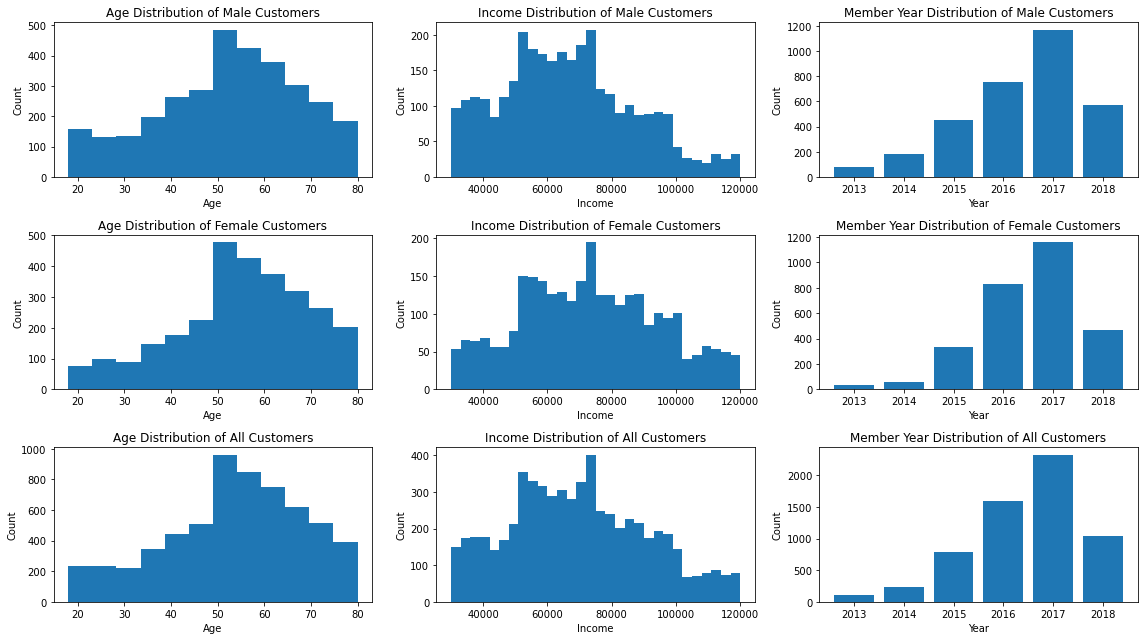

In [39]:
# Use the plot_distribution function to plot the data of buy one get one
plot_distribution(offer_bogo)

#### Conslusion1: Firstly, the male to female ratio is 1.11, which is less than the 1.50 in the profile data set. It is fair to say females are more likely to use the buy one get one offer compared to male. From the age distribution it is not hard to find people older than 50 are more like to use this offer. People with income from 50000 to 80000 are more likely to use the offer. It is possible that people with salary higher than 100000 tend to consume coffee with better quality and more expensive than the one offered buy Starbucks.  Most people become members in 2016 and 2017, maybe this service just start from 2013 and is not so expensive. In 2018 the number of members is decreased and it might influence the using rate of the buy one get one offer.  

The ratio of male to female is 1.31.


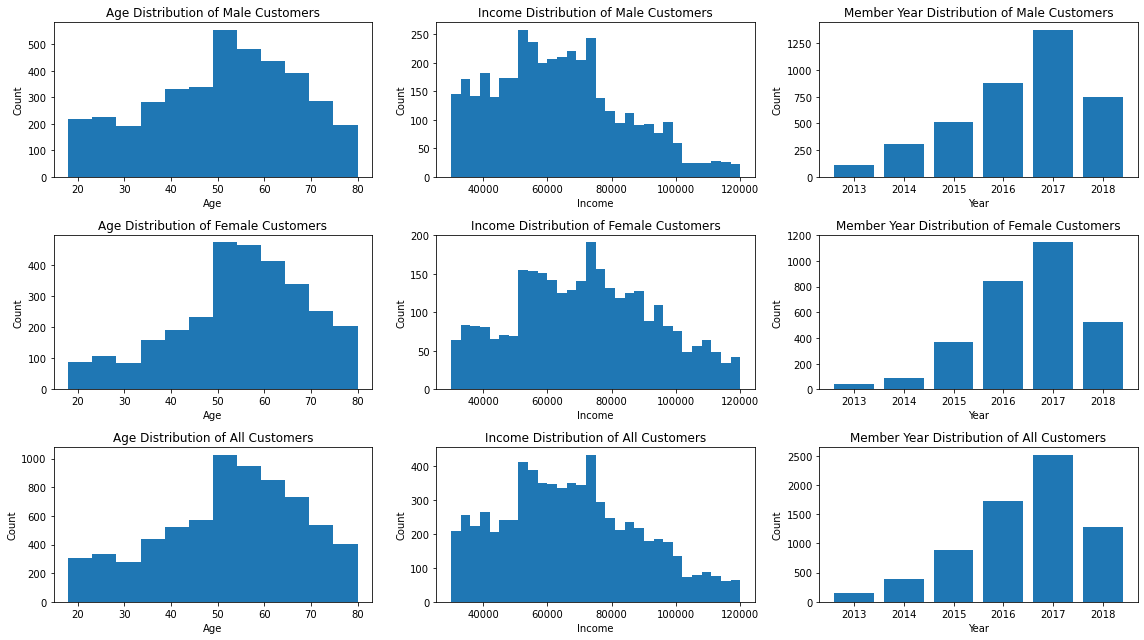

In [40]:
#  Use the plot_distribution function to plot the data of discount
plot_distribution(offer_discount)

#### Conslusion2: Firstly, the male to female ratio is 1.31, which is less than the 1.50 in the profile data set. It is fair to say females are more likely to use the discount offer compared to male. From the age distribution it is not hard to find people older than 50 are more like to use this offer. People with income from 50000 to 80000 are more likely to use the offer. It is possible that people with salary higher than 100000 tend to consume coffee with better quality and more expensive than the one offered buy Starbucks.  Most people become members in 2016 and 2017, maybe this service just start from 2013 and is not so expensive. In 2018 the number of members is decreased and it might influence the using rate of the discount offer.  

The ratio of male to female is 1.46.


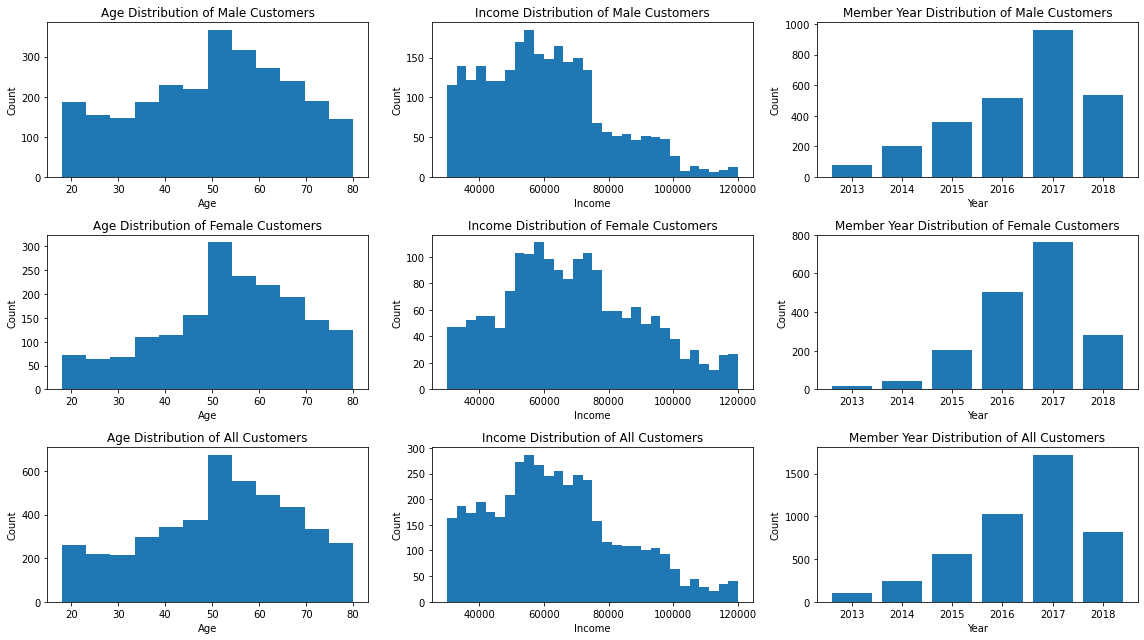

In [41]:
#  Use the plot_distribution function to plot the data of informational offer
plot_distribution(offer_info)

#### Conslusion3: Firstly, the male to female ratio is 1.46, which is similar with the 1.50 in the profile data set. It is fair to say both males and females buy coffee in Star Bucks after they see the informational offer. From the age distribution it is not hard to find people older than 50 are more like to use this offer. People with income from 50000 to 80000 are more likely to use the offer. It is possible that people with salary higher than 100000 tend to consume coffee with better quality and more expensive than the one offered buy Starbucks.  Most people become members in 2016 and 2017, maybe this service just start from 2013 and is not so expensive. In 2018 the number of members is decreased and it might influence the using rate of the discount offer.  

#### Final conclusion: The general trend is people who are older than 50 tend to use offers from Starbucks. For the real offers(which is buy one get one and discount), females are more proned to use them than males. People with salaries range around 50000 to 80000 are most likey to buy coffee from Star Bucks. It is interesting that the number of members decreased in 2018. Figuring out the reason of it might be helpful in making selling strategy.  In conclusion, it is reasonable to send more discount and buy one get one offers to females who are older than 50 and has a salary in between 50000 to 80000.  For the informational offer, it is reasonable to send the offer to equal amount of male and females.  
#### Discussion: In the portfolio data set there are a lot of useful information such as channel, duration and reward. If more specific infomartion could be offered (for each offer which channel was used to send it), it is possible to combine these features to make a model to predict which type offer should be sent to which kind of customer.  